<a href="https://colab.research.google.com/github/Kashara-Alvin-Ssali/Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the dataset path in Google Drive
dataset_zip_path = "/content/drive/My Drive/Dataset.zip"
extract_path = "/content/Dataset/"

# Extract the zip file
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully!


In [36]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib  # Save trained model


In [37]:
# Function to extract HOG and Color Histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract HOG Features
    hog_features, _ = hog(gray, orientations=9, pixels_per_cell=(8,8),
                          cells_per_block=(2,2), visualize=True, block_norm="L2-Hys")

    # Extract Color Histogram
    hist_b = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

    # Normalize histograms
    hist_b /= np.sum(hist_b)
    hist_g /= np.sum(hist_g)
    hist_r /= np.sum(hist_r)

    # Combine all features
    features = np.hstack([hog_features, hist_b, hist_g, hist_r])
    return features


In [38]:
# Paths to dataset
data_dir = "/content/Dataset/Dataset/Training/"
categories = ["Real", "Fake"]

X = []
y = []

# Loop through images and extract features
for label, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features = extract_features(img_path)
        X.append(features)
        y.append(label)  # 0 for Real, 1 for Fake

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, "/content/drive/My Drive/random_forest_currency.pkl")
print("Model saved to Google Drive!")


Model saved to Google Drive!


In [40]:
# Predictions on Test Set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print(classification_report(y_test, y_pred, target_names=categories))


Test Accuracy: 84.62%
              precision    recall  f1-score   support

        Real       0.78      1.00      0.88         7
        Fake       1.00      0.67      0.80         6

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



In [41]:
# Predictions on Test Set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print(classification_report(y_test, y_pred, target_names=categories))


Test Accuracy: 84.62%
              precision    recall  f1-score   support

        Real       0.78      1.00      0.88         7
        Fake       1.00      0.67      0.80         6

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



In [42]:
# Load Testing Data
test_dir = "/content/Dataset/Dataset/Testing/"
X_test_new = []
y_test_new = []

for label, category in enumerate(categories):
    folder_path = os.path.join(test_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features = extract_features(img_path)
        X_test_new.append(features)
        y_test_new.append(label)

# Convert to NumPy arrays
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# Load the saved model
rf_model = joblib.load("/content/drive/My Drive/random_forest_currency.pkl")

# Make predictions
y_pred_new = rf_model.predict(X_test_new)

# Accuracy on Testing Folder
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Test Accuracy on Dataset/Dataset/Testing: {accuracy_new * 100:.2f}%")

# Detailed Report
print(classification_report(y_test_new, y_pred_new, target_names=categories))


Test Accuracy on Dataset/Dataset/Testing: 100.00%
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00         2
        Fake       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [43]:
import joblib
import numpy as np
import cv2
from skimage.feature import hog

# Load the trained model
rf_model = joblib.load("/content/drive/My Drive/random_forest_currency.pkl")

# Function to extract features (same as before)
def extract_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hog_features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, block_norm="L2-Hys")

    hist_b = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

    hist_b /= np.sum(hist_b)
    hist_g /= np.sum(hist_g)
    hist_r /= np.sum(hist_r)

    features = np.hstack([hog_features, hist_b, hist_g, hist_r])
    return features

# Path to the new image
image_path = "/content/Dataset/Dataset/Testing/Fake/Fake1.jpg"  # Replace with the actual path

# Extract features from the image
image_features = extract_features(image_path)

# Reshape features to a 2D array (required for prediction)
image_features = image_features.reshape(1, -1)

# Make prediction
prediction = rf_model.predict(image_features)[0]

# Print the result
if prediction == 0:
    print("The image is classified as Real")
else:
    print("The image is classified as Fake")

The image is classified as Fake


In [44]:
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt # Import for visualization

# Function to extract HOG and Color Histogram features with visualization
def extract_features_and_visualize(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract HOG Features with visualization
    hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, block_norm="L2-Hys")

    # Extract Color Histogram
    hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

    # Normalize histograms
    hist_b /= np.sum(hist_b)
    hist_g /= np.sum(hist_g)
    hist_r /= np.sum(hist_r)

    # Combine all features
    features = np.hstack([hog_features, hist_b.flatten(), hist_g.flatten(), hist_r.flatten()])

    return features, hog_image, hist_b, hist_g, hist_r # Return HOG image and histograms

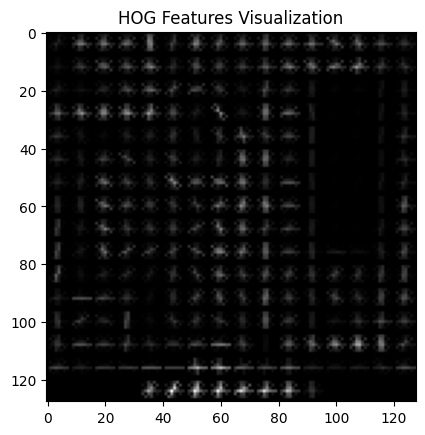

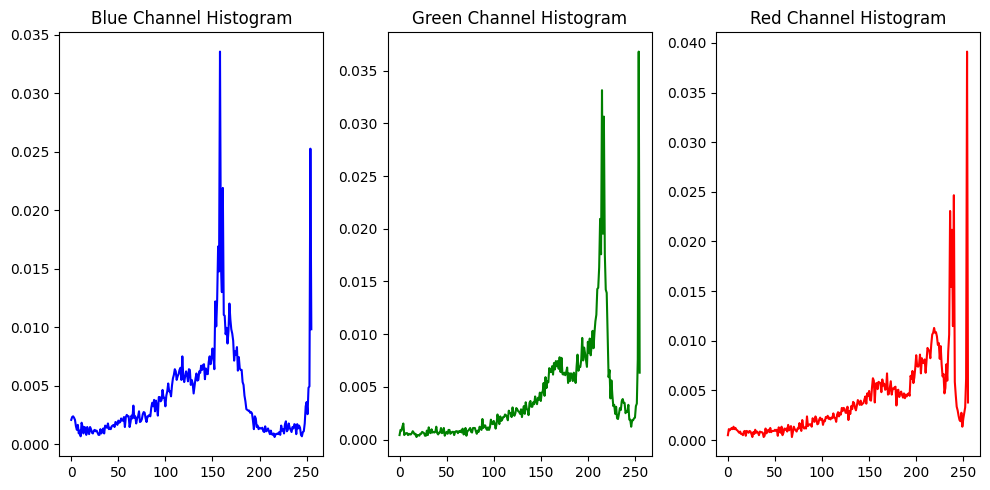

The image is classified as Fake


In [45]:
import joblib
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt  # For visualization

# ... (other code) ...

# Path to the new image
image_path = "/content/Dataset/Dataset/Testing/Fake/Fake1.jpg"  # Replace with the actual path

# Extract features and visualize
image_features, hog_image, hist_b, hist_g, hist_r = extract_features_and_visualize(image_path)

# Reshape features for prediction
image_features = image_features.reshape(1, -1)

# Make prediction
prediction = rf_model.predict(image_features)[0]

# Display HOG visualization
plt.imshow(hog_image, cmap="gray")
plt.title("HOG Features Visualization")
plt.show()

# Display color histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(hist_b, color='b')
plt.title("Blue Channel Histogram")
plt.subplot(1, 3, 2)
plt.plot(hist_g, color='g')
plt.title("Green Channel Histogram")
plt.subplot(1, 3, 3)
plt.plot(hist_r, color='r')
plt.title("Red Channel Histogram")
plt.tight_layout()
plt.show()


# Print the result
if prediction == 0:
    print("The image is classified as Real")
else:
    print("The image is classified as Fake")